In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [42]:
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })


In [43]:
df = pd.read_parquet("../data/combined-2022-included.parquet")
df = df[df["year"].isin([2003, 2006, 2009, 2012, 2015, 2018, 2022]) & (df["math"].notnull())]
df_synth = pd.read_parquet("../data/combined-2022-xgboost-synthetic-eiu.parquet")
df.head()

,country,year,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu
26,ALB,2009,4114.134033,4.053140,NaN,NaN,NaN,2927519.0,0,0.0,376.602063,385.432302,389.954863,0.019554,24.0,NaN
29,ALB,2012,4247.631343,1.584873,95.508392,87.214897,45.279148,2900401.0,0,0.0,395.296185,396.424292,399.068070,0.000000,0.0,5.67
32,ALB,2015,3952.803574,2.516827,NaN,NaN,NaN,2880703.0,0,0.0,411.554720,405.815539,427.608276,0.049410,37.0,5.91
35,ALB,2018,5287.660801,4.276312,NaN,NaN,NaN,2866376.0,0,0.0,437.554623,406.819682,416.779228,0.062738,37.0,5.98
39,ALB,2022,6810.114041,6.139017,NaN,NaN,NaN,2777689.0,0,0.0,368.221720,NaN,NaN,0.043564,62.0,6.41


In [44]:
df = df[df["population"] < 2e9]

In [45]:
df["arwu_ranked_num"] = df["arwu_ranked_num"] / df["population"] * 1_000_000
df["imo_total_score"] = df["imo_total_score"] / np.log(df["population"])
# # pd_df["arwu_ranked_num"] = np.maximum(pd_df["arwu_ranked_num"], pd_df["arwu_sum_score"]) / pd_df["population"] * 1_000_000
df["gdp_pc_growth"] = 100 * df["gdp_pc_growth"]
# # pd_df["gdp_pc"] = np.log(pd_df["gdp_pc"])
# # pd_df["population"] = np.log(pd_df["population"])

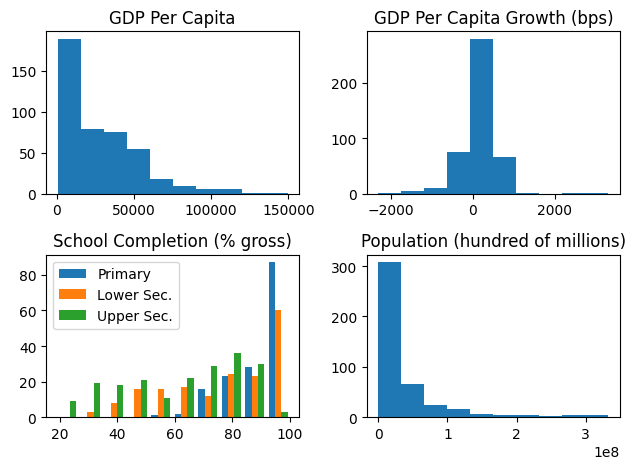

In [62]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.hist(df["gdp_pc"])
ax0.set_title("GDP Per Capita")

ax1.hist(df["gdp_pc_growth"])
ax1.set_title("GDP Per Capita Growth (bps)")

ax2.hist([df["primary_completion"], df["lower_sec_completion"], df["upper_sec_completion"]], label=["Primary", "Lower Sec.", "Upper Sec."])
ax2.legend(prop={'size': 10})
ax2.set_title("School Completion (% gross)")

ax3.hist(df["population"])
ax3.set_title("Population (hundred of millions)")
fig.tight_layout()
# fig.set_size_inches(w=4.3, h=4)
plt.savefig("wdi.png", dpi=300)

In [47]:
counts = df.groupby("year").count().reset_index()
counts

,year,country,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu
0,2003,40,40,40,4,5,6,40,40,40,40,40,40,40,40,0
1,2006,56,56,56,22,26,29,56,56,56,56,55,56,56,56,54
2,2009,69,69,69,38,44,48,69,69,69,69,69,69,69,69,0
3,2012,62,62,61,29,34,38,62,62,62,62,62,62,62,62,60
4,2015,65,65,65,34,38,43,65,65,65,65,65,65,65,65,64
5,2018,73,73,73,27,29,31,73,73,73,73,72,73,73,73,71
6,2022,76,76,76,3,3,3,76,76,76,76,0,0,76,76,74


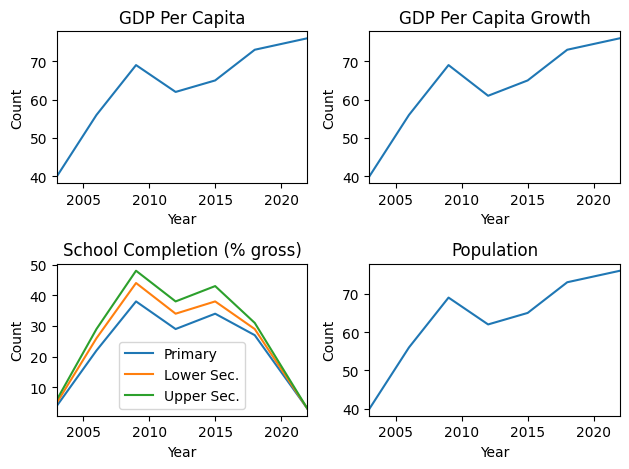

In [49]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)

for ax in [ax0, ax1, ax2, ax3]:
    ax.set_xlim((2003, 2022))
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")

# for ax in [ax0, ax1, ax3]:
    # ax.set_ylim((220, 260))


ax0.plot(counts["year"], counts["gdp_pc"])
ax0.set_title("GDP Per Capita")

ax1.plot(counts["year"], counts["gdp_pc_growth"])
ax1.set_title("GDP Per Capita Growth")

ax2.plot(counts["year"], counts["primary_completion"], label="Primary")
ax2.plot(counts["year"], counts["lower_sec_completion"], label="Lower Sec.")
ax2.plot(counts["year"], counts["upper_sec_completion"], label="Upper Sec.")
ax2.legend(prop={'size': 10})
ax2.set_title("School Completion (% gross)")

ax3.plot(counts["year"], counts["population"])
ax3.set_title("Population")
fig.tight_layout()
# fig.set_size_inches(w=4.3, h=4)
# plt.show()
plt.savefig("wdi-count.png", dpi=300)

In [50]:
country = df.groupby("country").mean()

In [51]:
country.sort_values(by=["arwu_sum_score"], ascending=False).head(10)

,year,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu
country,,,,,,,,,,,,,,,
USA,2012.142857,54383.894131,110.077319,98.746266,95.015196,87.671304,3.128574e+08,0.542178,2088.000000,475.948202,497.060056,494.810545,0.518937,9.653761,8.038
GBR,2012.142857,42070.011394,91.663468,99.788441,99.788441,86.203915,6.357412e+07,0.723054,375.400000,495.232892,499.181558,508.771609,1.177181,0.000000,8.282
JPN,2012.142857,38651.700712,33.214420,NaN,NaN,NaN,1.271893e+08,0.241568,142.542857,531.726167,512.728972,539.553325,2.662278,8.176072,8.102
CAN,2012.142857,44002.449082,32.658195,NaN,NaN,79.403389,3.489374e+07,0.668331,135.014286,509.932489,512.612879,515.030926,1.747339,8.494426,9.052
DEU,2012.142857,41418.712299,4.634097,100.000000,96.683998,81.411452,8.223273e+07,0.513773,129.485714,503.139478,501.707278,513.922042,1.310184,0.000000,8.656
CHE,2012.142857,75433.574375,51.241587,99.683060,96.594101,84.017178,8.019445e+06,1.016094,122.042857,519.793679,492.059137,503.154307,2.708463,0.000000,9.074
AUS,2012.142857,50048.669746,147.557890,99.902817,92.783241,73.585187,2.276880e+07,0.915944,118.985714,500.238255,505.812297,513.258889,1.738268,7.887529,9.024
FRA,2012.142857,38257.683350,38.660353,98.279635,80.555005,64.536008,6.541947e+07,0.370318,103.414286,495.597552,497.094374,500.041962,0.910529,6.396756,7.948
SWE,2012.142857,50208.430051,84.425487,100.000000,88.649632,77.684450,9.616852e+06,1.186571,92.185714,494.894016,501.842092,496.965921,0.985928,4.953895,9.568


In [52]:
print(country.sort_values(by=["imo_total_score"], ascending=False).head(10)[["imo_total_score", "gdp_pc", "gdp_pc_growth"]].round(4).to_latex())

\begin{tabular}{lrrr}
\toprule
 & imo_total_score & gdp_pc & gdp_pc_growth \\
country &  &  &  \\
\midrule
MNG & 10.772100 & 5045.504700 & 346.931900 \\
UKR & 10.559900 & 3096.562500 & 401.638200 \\
KOR & 10.233600 & 25089.496200 & 243.474900 \\
SGP & 9.658100 & 59952.823700 & 83.677800 \\
USA & 9.653800 & 54383.894100 & 110.077300 \\
RUS & 9.432200 & 9079.897100 & 216.599200 \\
ROU & 9.062600 & 10082.414900 & 360.521000 \\
VNM & 8.989500 & 2982.993900 & 582.879700 \\
SRB & 8.597300 & 6671.552600 & 264.282700 \\
THA & 8.579200 & 5048.680100 & 351.362500 \\
\bottomrule
\end{tabular}



In [53]:
print(country[country["imo_total_score"] > 0].sort_values(by=["imo_total_score"], ascending=False).tail(10)[["imo_total_score", "gdp_pc", "gdp_pc_growth"]].round(4).to_latex())

\begin{tabular}{lrrr}
\toprule
 & imo_total_score & gdp_pc & gdp_pc_growth \\
country &  &  &  \\
\midrule
LUX & 2.080200 & 100121.844900 & -14.787400 \\
KGZ & 2.066700 & 707.167500 & 182.603900 \\
TTO & 1.905100 & 16095.767100 & -319.409300 \\
PAN & 1.639500 & 13710.713800 & 358.415700 \\
URY & 1.349700 & 13174.415300 & 242.409500 \\
TUN & 1.145800 & 3639.320300 & 255.117300 \\
MNE & 1.124700 & 7200.032100 & 246.917100 \\
PSE & 0.907100 & 3789.328000 & 144.237100 \\
LIE & 0.667600 & 120173.290500 & 100.490300 \\
DOM & 0.533900 & 8299.113900 & 509.501600 \\
\bottomrule
\end{tabular}



In [54]:
df["year"] = df["year"].astype(str)
df.groupby("year")["arwu_ranked_num"].sum()

year
2003    14.501044
2006    16.105750
2009    16.650427
2012    16.481444
2015    15.082404
2018    36.153808
2022    32.611021
Name: arwu_ranked_num, dtype: float64

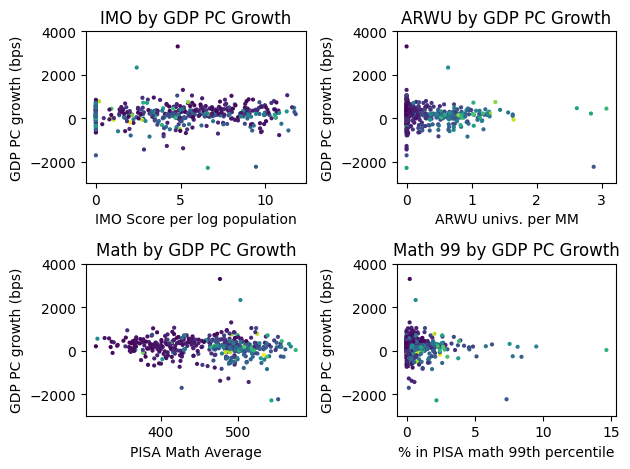

In [69]:
fig, ((bx0, bx1), (bx2, bx3)) = plt.subplots(2, 2)

bx0.scatter(df["imo_total_score"], df["gdp_pc_growth"], c=df["gdp_pc"], s=4)
bx0.set_xlabel("IMO Score per log population")
bx0.set_title("IMO by GDP PC Growth")

bx1.scatter(df["arwu_ranked_num"], df["gdp_pc_growth"], c=df["gdp_pc"], s=4)
bx1.set_xlabel("ARWU univs. per MM")
bx1.set_title("ARWU by GDP PC Growth")

bx2.scatter(df["math"], df["gdp_pc_growth"], c=df["gdp_pc"], s=4)
bx2.set_xlabel("PISA Math Average")
bx2.set_title("Math by GDP PC Growth")

bx3.scatter(df["in_math99"], df["gdp_pc_growth"], c=df["gdp_pc"], s=4)
bx3.set_xlabel("% in PISA math 99th percentile")
bx3.set_title("Math 99 by GDP PC Growth")

for bx in (bx0, bx1, bx2, bx3):
    bx.set_ylabel("GDP PC growth (bps)")
    bx.set_ylim((-3000, 4000))
fig.tight_layout()
fig.savefig("relationships.png", dpi=400)

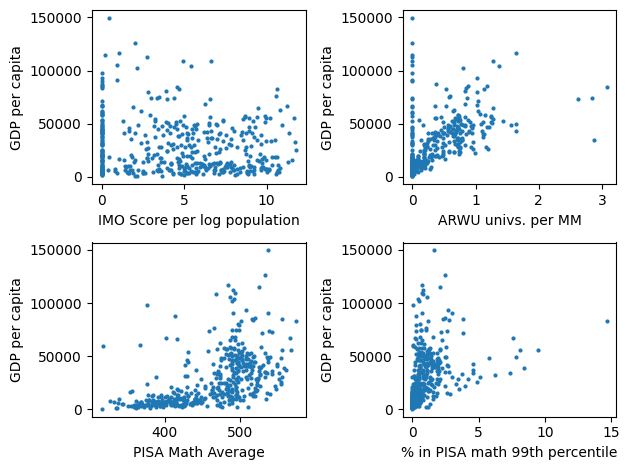

In [56]:
fig, ((bx0, bx1), (bx2, bx3)) = plt.subplots(2, 2)

bx0.scatter(df["imo_total_score"], df["gdp_pc"], s=4)
bx0.set_xlabel("IMO Score per log population")

bx1.scatter(df["arwu_ranked_num"], df["gdp_pc"], s=4)
bx1.set_xlabel("ARWU univs. per MM")

bx2.scatter(df["math"], df["gdp_pc"], s=4)
bx2.set_xlabel("PISA Math Average")

bx3.scatter(df["in_math99"], df["gdp_pc"], s=4)
bx3.set_xlabel("% in PISA math 99th percentile")

for bx in (bx0, bx1, bx2, bx3):
    bx.set_ylabel("GDP per capita")
    # bx.set_ylim((-5000, 10000))
fig.tight_layout()
fig.savefig("relationships-gdp-pc.png", dpi=400)

In [57]:
df.sort_values("imo_total_score", ascending=False).head(10)

,country,year,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu
2089,KOR,2012,25459.168900,186.559950,NaN,NaN,NaN,50199853.0,0.199204,0.0,554.228404,536.063023,537.924858,4.864535,11.786918,8.13
2099,KOR,2022,32422.574486,284.473475,NaN,NaN,NaN,51628117.0,0.581079,25.9,527.302502,NaN,NaN,6.255815,11.711991,8.03
1919,ISR,2022,54930.938808,475.267735,NaN,NaN,NaN,9557500.0,0.732409,82.3,457.896667,NaN,NaN,1.207422,11.696753,7.93
3219,ROU,2022,15786.801742,500.749294,NaN,NaN,NaN,19047009.0,0.052502,0.0,427.759997,NaN,NaN,0.344081,11.573507,6.45
1966,JPN,2009,41308.996837,-568.145234,NaN,NaN,NaN,128047000.0,0.242099,167.4,530.324143,521.721046,541.271523,2.608061,11.356388,NaN
599,BGR,2022,13974.449249,1055.971654,NaN,NaN,NaN,6465097.0,0.000000,0.0,417.303900,NaN,NaN,0.358378,11.286877,6.53
3435,SGP,2018,66836.521995,309.007522,87.908798,81.423561,73.523788,5638676.0,0.532040,53.0,566.049321,548.583819,548.876010,7.548339,11.257523,6.38
1739,HKG,2022,48983.621716,-259.598711,96.095657,80.618607,65.050278,7346100.0,0.952887,26.1,540.351801,NaN,NaN,7.775446,10.942663,5.28
4135,USA,2018,62823.309438,240.486787,99.031532,96.029373,89.805359,326838199.0,0.663937,1899.4,473.142717,500.150180,497.277201,0.427504,10.813581,7.96
3226,RUS,2009,8562.824219,-782.774998,NaN,NaN,NaN,142785349.0,0.014007,26.9,469.824770,462.223711,480.633664,0.444013,10.811183,NaN


In [58]:
pisa_df = df_synth[df_synth["year"].isin([2003, 2006, 2009, 2012, 2015, 2018, 2022]) & (df_synth["math"].notnull())]

In [59]:
means = pisa_df.groupby("year")[["gdp_pc_growth", "math", "in_math99", "imo_total_score", "arwu_ranked_num", "gdp_pc"]].mean().reset_index()
means

,year,gdp_pc_growth,math,in_math99,imo_total_score,arwu_ranked_num,gdp_pc
0,2003,220.357730,489.471223,1.116980,3.723708,0.362526,24861.683421
1,2006,513.681597,469.975805,0.860471,4.385081,0.287603,26549.083402
2,2009,-352.562351,460.171133,0.877577,4.646397,0.241311,26271.548909
3,2012,116.126030,470.886900,0.903009,4.426488,0.265830,33155.221712
4,2015,178.036844,462.036962,0.960861,3.995661,0.232037,27698.996565
5,2018,249.749268,459.528726,0.855801,5.136927,0.247629,29625.999698
6,2022,319.036536,438.023979,1.029099,6.044002,0.214546,29472.478438


In [60]:
stdevs = pisa_df.groupby("year")[["gdp_pc_growth", "math", "in_math99", "imo_total_score", "arwu_ranked_num", "gdp_pc"]].std().reset_index()
stdevs

,year,gdp_pc_growth,math,in_math99,imo_total_score,arwu_ranked_num,gdp_pc
0,2003,271.304646,51.846228,0.952858,2.765597,0.370087,19164.198088
1,2006,466.568559,58.822387,0.945694,2.983381,0.386239,24088.337043
2,2009,432.758489,57.071533,1.369421,3.535839,0.348133,24945.202661
3,2012,277.839664,51.532755,1.489608,3.156212,0.339820,30119.879170
4,2015,475.298524,52.785318,1.313589,2.915866,0.316925,23452.710951
5,2018,199.585424,52.836614,1.270125,3.734272,0.309880,25463.573190
6,2022,408.740229,57.768201,2.188175,4.202238,0.290921,26389.270232


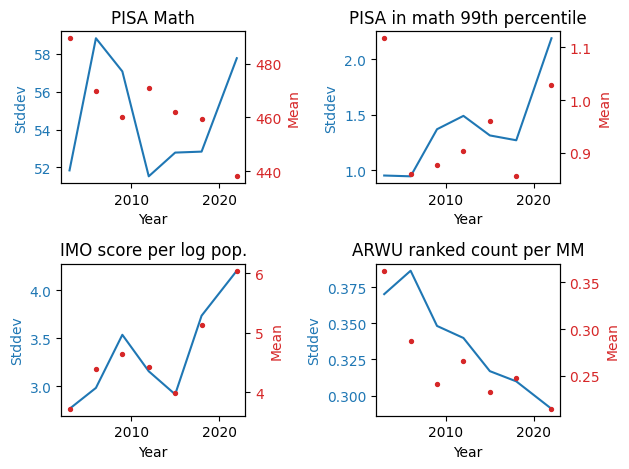

In [65]:
fig, ((bx0, bx1), (bx2, bx3)) = plt.subplots(2, 2)
plots = (bx0, bx1, bx2, bx3)
vars = ["math", "in_math99", "imo_total_score", "arwu_ranked_num"]
names = ["PISA Math", "PISA in math 99th percentile", "IMO score per log pop.", "ARWU ranked count per MM"]
for i,v in enumerate(vars):
    color = 'tab:blue'
    ax = plots[i]
    ax.plot(stdevs["year"], stdevs[v])
    ax.set_title(names[i])
    # ax.set_xlim((2003, 2022))
    ax.set_xlabel("Year")
    ax.set_ylabel("Stddev", color=color)
    ax.tick_params(axis='y', labelcolor=color)
    color = 'tab:red'
    # ax.set_xticks([2003, 2006, 2009, 2012, 2015, 2018, 2022])

    sec = ax.twinx()
    sec.scatter(means["year"], means[v], color=color, s=8)
    sec.set_ylabel("Mean", color=color)
    sec.tick_params(axis='y', labelcolor=color)
# fig.xticks([2003, 2006, 2009, 2012, 2015, 2018, 2022])
fig.tight_layout()
fig.savefig("std-dev.png", dpi=400)
